In [5]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[6]')

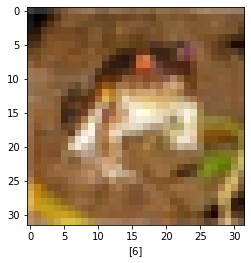

In [ ]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])

In [ ]:
print(x_train[0])
print(x_test[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ..

In [ ]:
#Normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train[0])
print(x_test[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [ ]:
print(y_train[:5])
y_train.shape

[[6]
 [9]
 [9]
 [4]
 [1]]


(50000, 1)

Text(0.5, 0, '[6]')

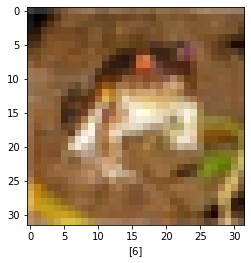

In [ ]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
cnn = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
cnn.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 10, 10, 128)       73856     
                                                          

In [ ]:
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = cnn.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)
#Observations:

# File "/usr/local/lib/python3.7/dist-packages/keras/backend.py", line 5119, in categorical_crossentropy
     #   target.shape.assert_is_compatible_with(output.shape)

  #  ValueError: Shapes (None, 1) and (None, 10) are incompatible

#  This error has to be solved by changing categorical_crossentropy into sparse_categorical_crossentropy because 
#  I just realized that by using y_train.shape labels aren't (one-hot) vectors but numbers 

#  Softmax is ideal here 

# One of the Error was that I was giving Validation split = 10 rather than 0.1

#  Model was fitting however showing loss: 0.0000e+00 and accuracy: 0.1003 at every epoch because of single output neuron and the 
#  categorical_crossentropy loss function
#  Imagine having 100 individual items of 10 classes and classifying all of them as class 1 items and getting 10% accuracy due to the above anomaly

Epoch 1/50
88/88 [==============================] - 3s 30ms/step - loss: 1.8485 - accuracy: 0.3274 - val_loss: 1.5345 - val_accuracy: 0.4490
Epoch 2/50
88/88 [==============================] - 2s 27ms/step - loss: 1.4654 - accuracy: 0.4745 - val_loss: 1.3533 - val_accuracy: 0.5226
Epoch 3/50
88/88 [==============================] - 2s 27ms/step - loss: 1.3362 - accuracy: 0.5254 - val_loss: 1.3070 - val_accuracy: 0.5314
Epoch 4/50
88/88 [==============================] - 3s 31ms/step - loss: 1.2683 - accuracy: 0.5532 - val_loss: 1.2082 - val_accuracy: 0.5730
Epoch 5/50
88/88 [==============================] - 2s 27ms/step - loss: 1.1826 - accuracy: 0.5854 - val_loss: 1.1233 - val_accuracy: 0.6040
Epoch 6/50
88/88 [==============================] - 3s 29ms/step - loss: 1.1362 - accuracy: 0.6038 - val_loss: 1.1467 - val_accuracy: 0.6038
Epoch 7/50
88/88 [==============================] - 2s 28ms/step - loss: 1.0637 - accuracy: 0.6283 - val_loss: 1.0308 - val_accuracy: 0.6414
Epoch 8/50
88

In [ ]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
# Supposed to pass both data+labels not just x_test
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 1.0119 - accuracy: 0.7260


0.7260000109672546

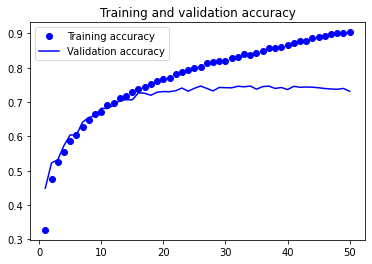

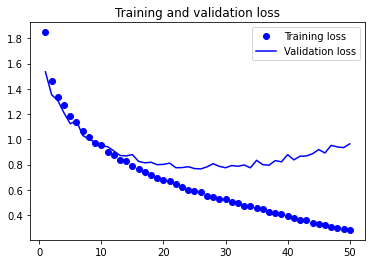

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# serialize model to JSON
model_json = cnn.to_json()
with open("/content/drive/MyDrive/Models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("/content/drive/MyDrive/Models/model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

Saved model to disk


In [ ]:
#Overcoming Overfitting using lesser no. of Epochs defining same model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
cnn2 = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
cnn2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                             

In [ ]:
cnn2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x_train, y_train, batch_size=512, epochs=14, validation_split=0.1)

Epoch 1/14
88/88 [==============================] - 11s 36ms/step - loss: 1.7825 - accuracy: 0.3578 - val_loss: 1.5035 - val_accuracy: 0.4544
Epoch 2/14
88/88 [==============================] - 2s 27ms/step - loss: 1.4317 - accuracy: 0.4863 - val_loss: 1.3651 - val_accuracy: 0.5070
Epoch 3/14
88/88 [==============================] - 2s 27ms/step - loss: 1.3009 - accuracy: 0.5389 - val_loss: 1.2206 - val_accuracy: 0.5640
Epoch 4/14
88/88 [==============================] - 3s 34ms/step - loss: 1.2044 - accuracy: 0.5759 - val_loss: 1.1766 - val_accuracy: 0.5914
Epoch 5/14
88/88 [==============================] - 3s 36ms/step - loss: 1.1326 - accuracy: 0.6026 - val_loss: 1.1127 - val_accuracy: 0.6038
Epoch 6/14
88/88 [==============================] - 3s 37ms/step - loss: 1.0599 - accuracy: 0.6333 - val_loss: 1.0686 - val_accuracy: 0.6252
Epoch 7/14
88/88 [==============================] - 3s 29ms/step - loss: 1.0028 - accuracy: 0.6527 - val_loss: 1.0164 - val_accuracy: 0.6448
Epoch 8/14
8

In [ ]:
test_loss, test_acc = cnn2.evaluate(x_test, y_test)
# Supposed to pass both data+labels not just x_test
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.8705 - accuracy: 0.7014


0.7013999819755554

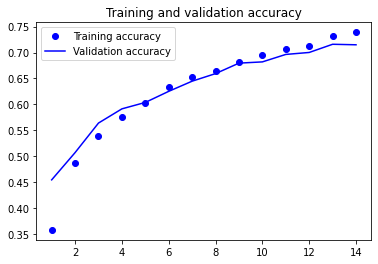

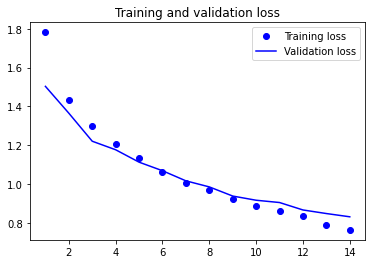

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#from tensorflow.keras.utils import image_dataset_from_directory
#dir_main = "/content/drive/MyDrive/Datasets (Machine Learning)/CIFAR-10-images-master"
#train_dataset = image_dataset_from_directory(
 #   dir_main +"/train",
 #   image_size=(32, 32),
 #   batch_size=256)

#test_dataset = image_dataset_from_directory(
 #   dir_main +"/test",
 #   image_size=(32, 32),
 #   batch_size=256)

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
#Normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
#for data_batch, labels_batch in train_dataset:
 #   print("data batch shape:", data_batch.shape)
 #   print("labels batch shape:", labels_batch.shape)
 #   break

data batch shape: (256, 32, 32, 3)
labels batch shape: (256,)


In [ ]:
#  Data Augmentation
data_augmentation = keras.Sequential([
   layers.RandomFlip("horizontal"),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.2),
   layers.RandomBrightness(0.4),
   layers.RandomContrast(0.1)
 ])

In [ ]:
#plt.figure(figsize=(10, 10))
#for images in train_dataset.take(1):
 #   for i in range(9):
  #      augmented_images = data_augmentation(images)
  #     ax = plt.subplot(3, 3, i + 1)
  #      plt.imshow(augmented_images[8].numpy().astype("uint8"))
  #      plt.axis("off")

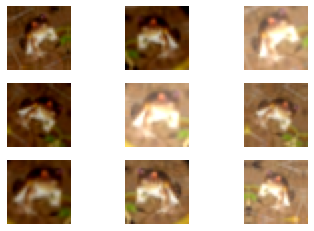

In [ ]:
for i in range(9):
  augmented_images = data_augmentation(x_train[:9])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32,32,3))
x = data_augmentation(inputs)                #Adding Augmentation Layer
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
cnn3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
cnn3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 128)       73856     
                                                           

In [ ]:
cnn3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#We have to go up and check the shape of elements in the recently created dataset

In [ ]:
history = cnn3.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5242 - accuracy: 0.4512 - val_loss: 1.2080 - val_accuracy: 0.5758
Epoch 2/50
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0953 - accuracy: 0.6155 - val_loss: 1.0062 - val_accuracy: 0.6492
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9106 - accuracy: 0.6839 - val_loss: 0.8939 - val_accuracy: 0.6976
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7989 - accuracy: 0.7224 - val_loss: 0.8732 - val_accuracy: 0.7116
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7218 - accuracy: 0.7470 - val_loss: 0.8309 - val_accuracy: 0.7238
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6566 - accuracy: 0.7713 - val_loss: 0.8054 - val_accuracy: 0.7238
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6059 - accuracy: 0.7872 - val_loss: 0.8254 - val_accuracy:

In [ ]:
test_loss, test_acc = cnn3.evaluate(x_test, y_test)
# Supposed to pass both data+labels not just x_test
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 3.0861 - accuracy: 0.6938


0.6937999725341797

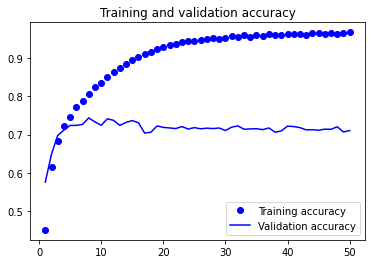

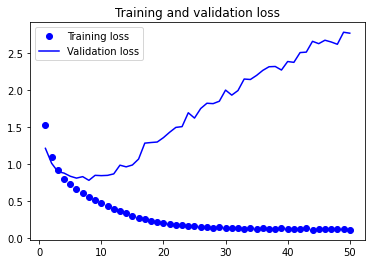

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
#Normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
#Overcoming Overfitting using lesser no. of Epochs defining same model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32,32,3))
x = data_augmentation(inputs)                #Adding Augmentation Layer
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
cnn4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
cnn4.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 128)       73856     
                                                           

In [ ]:
cnn4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = cnn4.fit(x_train, y_train, epochs=6, validation_split=0.1)

Epoch 1/6
1407/1407 [==============================] - 8s 5ms/step - loss: 1.4749 - accuracy: 0.4669 - val_loss: 1.1915 - val_accuracy: 0.5722
Epoch 2/6
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0341 - accuracy: 0.6382 - val_loss: 0.9049 - val_accuracy: 0.6888
Epoch 3/6
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8433 - accuracy: 0.7092 - val_loss: 0.8119 - val_accuracy: 0.7230
Epoch 4/6
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7363 - accuracy: 0.7468 - val_loss: 0.7974 - val_accuracy: 0.7260
Epoch 5/6
1407/1407 [==============================] - 6s 5ms/step - loss: 0.6575 - accuracy: 0.7736 - val_loss: 0.7456 - val_accuracy: 0.7466
Epoch 6/6
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5920 - accuracy: 0.7955 - val_loss: 0.7798 - val_accuracy: 0.7432


In [ ]:
test_loss, test_acc = cnn4.evaluate(x_test, y_test)
# Supposed to pass both data+labels not just x_test
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.8003 - accuracy: 0.7363


0.736299991607666

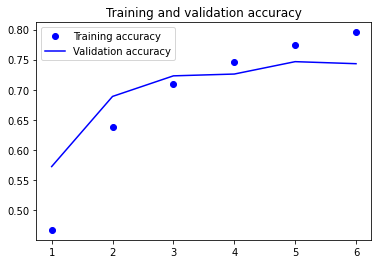

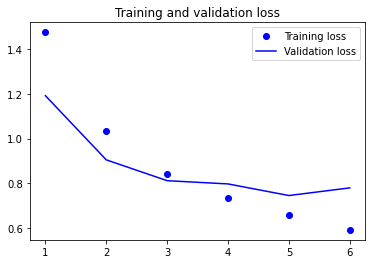

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#augmented_images = data_augmentation(x_train[0])

#for i in range(9):
 # ax = plt.subplot(3, 3, i+1)
  #plt.imshow(augmented_images[i].numpy().astype("uint8"))

In [ ]:
#  Using Pretrained Model 
#  Instantiating the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(32, 32, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

**Run the convolutional base over our dataset, record its output to a NumPy array
on disk, and then use this data as input to a standalone, densely connected classifier similar to those you saw in chapter 4 of this book. This solution is fast and
cheap to run, because it only requires running the convolutional base once for
every input image, and the convolutional base is by far the most expensive part
of the pipeline. But for the same reason, this technique won’t allow us to use
data augmentation.**


In [ ]:
import numpy as np
def get_features_and_labels(dataset_images, dataset_labels):
  all_features = []
  all_labels = []
  for images, labels in dataset_images, dataset_labels:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [41]:
#train_features, train_labels =  get_features_and_labels(x_train,y_train)
#test_features, test_labels =  get_features_and_labels(x_test, y_test)

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))

x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)

  # Output
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 15s 10ms/step - loss: 2.2403 - accuracy: 0.1917 - val_loss: 2.1071 - val_accuracy: 0.2330
Epoch 2/50
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0820 - accuracy: 0.2369 - val_loss: 2.0853 - val_accuracy: 0.2486
Epoch 3/50
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0377 - accuracy: 0.2545 - val_loss: 1.9948 - val_accuracy: 0.2848
Epoch 4/50
1407/1407 [==============================] - 15s 10ms/step - loss: 2.0082 - accuracy: 0.2674 - val_loss: 1.9729 - val_accuracy: 0.2912
Epoch 5/50
1407/1407 [==============================] - 15s 10ms/step - loss: 1.9924 - accuracy: 0.2714 - val_loss: 1.9684 - val_accuracy: 0.2870
Epoch 6/50
1407/1407 [==============================] - 15s 10ms/step - loss: 1.9758 - accuracy: 0.2812 - val_loss: 1.9888 - val_accuracy: 0.2810
Epoch 7/50
1407/1407 [==============================] - 15s 10ms/step - loss: 1.9648 - accuracy: 0.2848 - val_loss: 1.9278 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# Supposed to pass both data+labels not just x_test
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 1.8426 - accuracy: 0.3215


0.3215000033378601

**VGG (Feature Extraction)**

In [22]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [23]:
#Normalization
x_train = x_train/255
x_test = x_test/255

In [24]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [26]:
x_train = conv_base.predict(x_train)
x_test= conv_base.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [27]:
x_train.shape
x_train = np.reshape(x_train,(50000,512))
x_test = np.reshape(x_test,(10000,512))

In [28]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Dropout
model = Sequential()

model.add(Dense(256, activation='relu',input_dim=1*1*512))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
              
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1064 - accuracy: 0.6106 - val_loss: 1.0949 - val_accuracy: 0.6168
Epoch 2/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0977 - accuracy: 0.6146 - val_loss: 1.0984 - val_accuracy: 0.6180
Epoch 3/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0859 - accuracy: 0.6198 - val_loss: 1.0977 - val_accuracy: 0.6130
Epoch 4/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0716 - accuracy: 0.6248 - val_loss: 1.0795 - val_accuracy: 0.6218
Epoch 5/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0644 - accuracy: 0.6276 - val_loss: 1.0878 - val_accuracy: 0.6292
Epoch 6/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0571 - accuracy: 0.6260 - val_loss: 1.0849 - val_accuracy: 0.6254
Epoch 7/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0471 - accuracy: 0.6300 - val_loss: 1.0752 - val_accuracy:

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 1.2145 - accuracy: 0.6186


0.6186000108718872

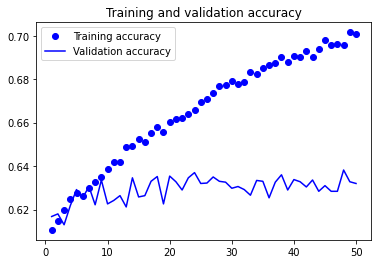

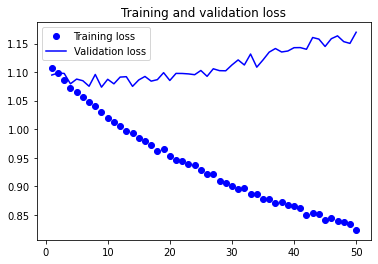

In [33]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [35]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Dropout
model2 = Sequential()

model2.add(Dense(128, activation='relu',input_dim=1*1*512))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
              
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model2.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5893 - accuracy: 0.4409 - val_loss: 1.2746 - val_accuracy: 0.5576
Epoch 2/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3717 - accuracy: 0.5216 - val_loss: 1.2249 - val_accuracy: 0.5792
Epoch 3/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3226 - accuracy: 0.5368 - val_loss: 1.1833 - val_accuracy: 0.5838
Epoch 4/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2875 - accuracy: 0.5512 - val_loss: 1.1602 - val_accuracy: 0.5962
Epoch 5/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2619 - accuracy: 0.5592 - val_loss: 1.1478 - val_accuracy: 0.6012
Epoch 6/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2480 - accuracy: 0.5641 - val_loss: 1.1431 - val_accuracy: 0.6018
Epoch 7/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2319 - accuracy: 0.5722 - val_loss: 1.1328 - val_accuracy:

In [39]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 1.1610 - accuracy: 0.6054


0.605400025844574

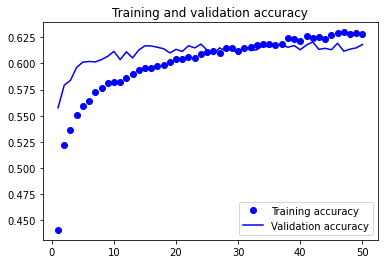

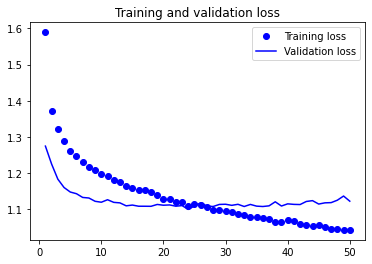

In [40]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**VGG (Tuning Parameters)**

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [3]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
inputs = keras.Input(shape=(32,32,3))
x = conv_base(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dense (Dense)               (None, 1, 1, 128)         65664     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
#Normalization
x_train = x_train/255
x_test = x_test/255

170498071/170498071 [==============================] - 3s 0us/step


In [10]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 35s 18ms/step - loss: 1.1517 - accuracy: 0.5964 - val_loss: 0.9665 - val_accuracy: 0.6688
Epoch 2/50
1407/1407 [==============================] - 25s 17ms/step - loss: 0.8380 - accuracy: 0.7140 - val_loss: 0.8869 - val_accuracy: 0.6964
Epoch 3/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.7347 - accuracy: 0.7475 - val_loss: 0.7991 - val_accuracy: 0.7262
Epoch 4/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.6586 - accuracy: 0.7749 - val_loss: 0.7979 - val_accuracy: 0.7414
Epoch 5/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.5978 - accuracy: 0.7921 - val_loss: 0.8002 - val_accuracy: 0.7328
Epoch 6/50
1407/1407 [==============================] - 25s 17ms/step - loss: 0.5432 - accuracy: 0.8120 - val_loss: 0.8234 - val_accuracy: 0.7460
Epoch 7/50
1407/1407 [==============================] - 25s 17ms/step - loss: 0.4957 - accuracy: 0.8261 - val_loss: 0.8241 -

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 4s 12ms/step - loss: 2.1266 - accuracy: 0.7337


0.7336999773979187

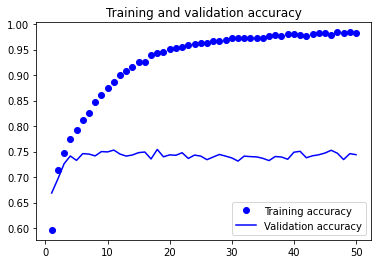

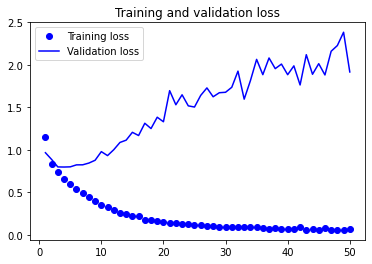

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [2]:
import pandas as pd
expList = ["Revise CNN with four Convolution Layers","Revise CNN with four Convolution Layers on augmented data","Revise VGG-16 Feature extraction","Revise VGG-16 fine-tuning"]
accList = [0.69,0.73,0.60,0.73]


for i in range(4):
  accList[i] = "{:.2f}".format(accList[i]*100)+"%"

summary = pd.DataFrame({"Experiment":expList,"Testing Accuracy":accList})
summary

,Experiment,Testing Accuracy
0,Revise CNN with four Convolution Layers,69.00%
1,Revise CNN with four Convolution Layers on aug...,73.00%
2,Revise VGG-16 Feature extraction,60.00%
3,Revise VGG-16 fine-tuning,73.00%
